# MODEL TRAINING:


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from imblearn.combine import SMOTETomek
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve, precision_recall_curve,average_precision_score 
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [3]:
df = pd.read_csv("filter.csv")

In [21]:
df.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [4]:
df.shape


(100, 465)

In [5]:
# Splitting Data
train_data,test_data = train_test_split(df,test_size=0.20,random_state=85)

In [6]:
train_data.shape,test_data.shape

((80, 465), (20, 465))

In [7]:
X_train_arr = train_data.drop(columns="Good/Bad", axis =1)
y_train_arr = train_data["Good/Bad"]

X_test_arr = test_data.drop(columns="Good/Bad", axis =1)
y_test_arr = test_data["Good/Bad"]

In [8]:
X_train_arr.shape,y_train_arr.shape

((80, 464), (80,))

In [136]:
X_test_arr.shape,y_test_arr.shape

((20, 464), (20,))

In [9]:
# Mapping Target column {-1:0}
y_train_arr = np.where(y_train_arr==-1,0,1)
y_test_arr = np.where(y_test_arr==-1,0,1)

In [10]:
print(y_test_arr,y_train_arr)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [11]:
## Creating Pipeline

feature_pipeline = Pipeline(
    steps=[
        ('imputer',KNNImputer(n_neighbors=3)),
        ('scaler',RobustScaler())
    ]
)



In [12]:
feature_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', RobustScaler())])

In [13]:
X_train_new = feature_pipeline.fit_transform(X_train_arr)
X_test_new = feature_pipeline.transform(X_test_arr)



In [14]:
X_test_new,X_train_new

(array([[ 1.11006084, -1.32056635,  0.23117758, ..., -0.46315789,
         -0.37931034, -0.11358926],
        [ 0.44943468, -0.08719066,  0.19691686, ...,  0.92631579,
          0.68965517,  0.31068481],
        [ 0.83285897,  0.04568282, -0.05436812, ...,  1.29473684,
          1.72413793,  2.37220594],
        ...,
        [-0.23490091, -0.23410177,  4.7004079 , ..., -0.95789474,
         -0.75862069, -0.40590176],
        [-0.56860851, -0.68693653,  0.51627507, ..., -0.73684211,
         -0.48275862, -0.56077845],
        [-0.01712928,  0.49984873,  0.40388332, ..., -0.27368421,
         -0.03448276,  0.7984325 ]]),
 array([[ 1.15956863e+00, -1.11605252e+00,  4.89777708e-01, ...,
          1.29473684e+00,  1.72413793e+00,  2.37220594e+00],
        [ 1.71292791e-02,  9.22914019e-01,  5.03939242e-01, ...,
          1.05263158e-01,  2.75862069e-01,  2.44727886e-01],
        [-8.73488785e-01,  2.36643069e-01, -4.76985452e-01, ...,
          1.29473684e+00,  1.72413793e+00,  2.37220594e+

In [15]:
# Upsampling the imbalance feature:

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_new, y_train_arr)
X_test_res, y_test_res = ros.fit_resample(X_test_new, y_test_arr)

In [16]:
print(X_train_res.shape,y_train_res.shape)
print(X_test_res.shape,y_test_res.shape)

(152, 464) (152,)
(36, 464) (36,)


After resampling we got equal number of 1 and 0 for the target feature of train and test data set.

In [17]:
#y_train_res.value_counts()
unique_values, counts = np.unique(y_train_res, return_counts=True)

In [18]:
print(unique_values,counts)

[0 1] [76 76]


In [19]:
X_train,X_test,y_train,y_test = (X_train_res,X_test_res,y_train_res,y_test_res)

In [20]:
print(X_train.shape,X_test.shape)

print(y_train.shape,y_test.shape)

(152, 464) (36, 464)
(152,) (36,)


# Model Selection and Model Training:

In [21]:
def evaluate_model(true, predicted):
    cl_report = classification_report(true, predicted)
    con_mat = confusion_matrix(true, predicted)
    roc_score = roc_auc_score(true,predicted)*100
    acc_score = accuracy_score(true, predicted)*100
    return cl_report, con_mat,roc_score, acc_score

In [22]:
# List of Models used:
models = {  "Random Forest": RandomForestClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Gradient Boosting": GradientBoostingClassifier(),
            "K-Neighbors Classifier": KNeighborsClassifier(),
            "XGBClassifier": XGBClassifier(),
            "AdaBoost Classifier": AdaBoostClassifier()
}


In [29]:
# Model Training and performance evaluation:

def training(models):
    perf = {}
    roc_auc_curve = {}
    p_r_curve = {}


    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        #Make Predictions
        y_train_pred1 = model.predict(X_train)
        y_test_pred1=model.predict(X_test)

        # Computing scores
        cl_report1, con_mat1,roc_score1, acc_score1 = evaluate_model(y_test, y_test_pred1)

        train_score=accuracy_score(y_train,y_train_pred1)*100

        # Evaluating AUC Curve:
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Evaluating Precision-Recall Curve:
        pr_auc_score = average_precision_score(y_test, y_pred_proba)
        precision, recall,_ = precision_recall_curve(y_test, y_pred_proba)

        # Storing scores in Dict:
        perf[list(models.keys())[i]] = train_score,acc_score1,roc_score1,pr_auc_score,cl_report1,con_mat1
        roc_auc_curve[list(models.keys())[i]] = fpr,tpr
        p_r_curve[list(models.keys())[i]] = precision,recall
    
    cols = ['Train Accuracy','Test Accuracy','ROC-AUC Score','PR-AUC Score',    'Classification','Confusion']

    #Converting result into dataframe
    perf_df = pd.DataFrame.from_dict(perf,orient='index', columns=cols)
    perf_df = perf_df.transpose()

    return perf_df,roc_auc_curve,p_r_curve
    

In [32]:
result_df,roc_auc_curve,p_r_curve = training(models=models)

c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [33]:
result_df

,Random Forest,Decision Tree,Gradient Boosting,K-Neighbors Classifier,XGBClassifier,AdaBoost Classifier
Train Accuracy,100.0,100.0,100.0,94.078947,100.0,100.0
Test Accuracy,63.888889,58.333333,50.0,94.444444,50.0,50.0
ROC-AUC Score,63.888889,58.333333,50.0,94.444444,50.0,50.0
PR-AUC Score,0.819444,0.559524,0.559524,0.961988,0.773148,0.927778
Classification,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
Confusion,"[[18, 0], [13, 5]]","[[16, 2], [13, 5]]","[[18, 0], [18, 0]]","[[16, 2], [0, 18]]","[[18, 0], [18, 0]]","[[18, 0], [18, 0]]"


In [34]:
# Display results for best Model:
for index, row in result_df.iterrows():
    print(f"{index}: {row['K-Neighbors Classifier']}\n")

Train Accuracy: 94.07894736842105

Test Accuracy: 94.44444444444444

ROC-AUC Score: 94.44444444444444

PR-AUC Score: 0.9619883040935672

Classification:               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.90      1.00      0.95        18

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion: [[16  2]
 [ 0 18]]



- In order to classify the faulty and good wafers, high accuracies alone won't help. We need to lookup for ROC_AUC scores and Precision Recall scores to prioritize the ability of the model to distinguish between the good(1) and faulty(0) classes effectively.
- This is an imbalanced datasets, with far fewer fraudulent cases than legitimate transactions.
- It can be seen that K-Neighbors Classifiers outperform over every model with a highest train and test accuracy. Although we can perform hyperparameter tunning and check for the change in accuracy.

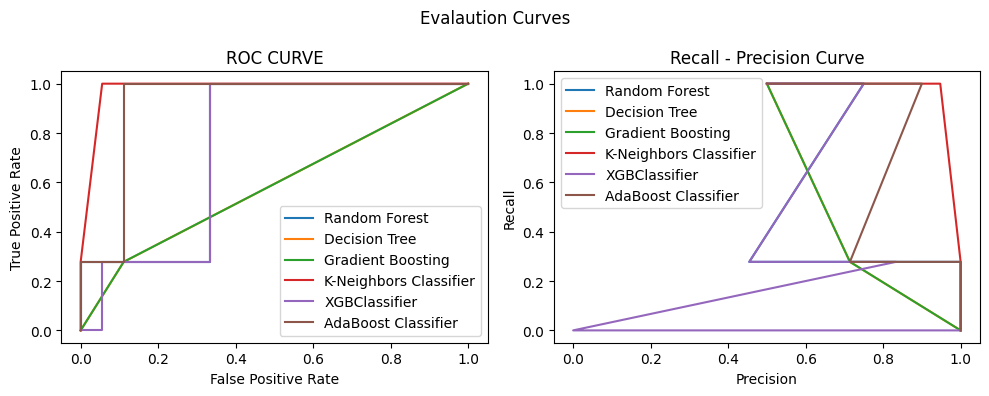

In [42]:
# Evaluating Curves:

fig,ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Evalaution Curves')

# Evaluating ROC Curve:

for key,value in roc_auc_curve.items():
    ax[0].plot(value[0],value[1],label=key)
    

ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title('ROC CURVE')
ax[0].legend()


# Evaluating Precision Recall Curve:

for key,value in p_r_curve.items():
    ax[1].plot(value[0],value[1],label=key)
    

ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Precision')
ax[1].set_title('Recall - Precision Curve')
ax[1].legend()

fig.tight_layout()
plt.show()   

In [43]:
# list of parameters for every model:
params={
    "Random Forest": {
        'criterion':['gini', 'entropy'],
            'n_estimators':[32,70,90,100,120,150],
            'max_features':['sqrt','log2'],
    },
    "Decision Tree":{
        'criterion':['gini', 'entropy'],
        'max_features':['sqrt','log2', None],
        'splitter': ['best','random']
    },
    "Gradient Boosting":{
        'loss':['log_loss', 'exponential'],
        'learning_rate':[0.001,0.01,0.1,0.05,0.005],
        'n_estimators':[32,70,100,120,150],
        'criterion':['friedman_mse', 'squared_error']
    },
    "K-Neighbors Classifier":{
        'n_neighbors':[3,5,8,12,15],
        'weights':['uniform', 'distance']
    },

    "XGBClassifier":{
        'booster':['gbtree', 'gblinear','dart']
    },
    "AdaBoost Classifier":{
        'algorithm':['SAMME', 'SAMME.R'],
        'learning_rate':[0.001,0.01,0.1,0.05],
        'n_estimators':[20,32,70,100]
    }}



In [53]:
# Final Evaluation with Hyperparameter tunning :

def hyp_training(models,params):
    report={}
    roc_auc_curve1={}
    p_r_curve1 = {}

        
    for i in range(len(list(models))):
        model=list(models.values())[i]
        param=params[list(models.keys())[i]]
        rc = RandomizedSearchCV(estimator=model,param_distributions=param, cv=3)
        #randomcv.fit(X_train,y_train)
        rc.fit(X_train,y_train)

        model.set_params(**rc.best_params_)
        model.fit(X_train,y_train)

        #Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred=model.predict(X_test)

        # print('Model Training Performance')
        cl_report, con_mat,roc_score, test_acc_score = evaluate_model(y_test, y_test_pred)
        train_acc_score = accuracy_score(y_train,y_train_pred)*100

        # Evaluating AUC Curve:
        y_pred_proba1 = model.predict_proba(X_test)[::,1]
        fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
        
        # Evaluating Precision-Recall Curve:
        pr_auc_score1 = average_precision_score(y_test, y_pred_proba1)
        precision1, recall1,_ = precision_recall_curve(y_test, y_pred_proba1)

        report[list(models.keys())[i]] = train_acc_score,test_acc_score,roc_score,pr_auc_score1,cl_report,con_mat
        roc_auc_curve1[list(models.keys())[i]] = fpr1,tpr1
        p_r_curve1[list(models.keys())[i]] = precision1,recall1

    cols = ['Train Accuracy','Test Accuracy','ROC-AUC Score','PR-AUC Score','Classification','Confusion']

    report_df = pd.DataFrame.from_dict(report,orient='index', columns=cols)
    report_df = report_df.transpose()

    return report_df,roc_auc_curve1,p_r_curve1

        

In [54]:
result_df,roc_auc_curve1,p_r_curve1 = hyp_training(models,params)

c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[16:46:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:46:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pnavn\Desktop\project_clone\WaferFaultDetection\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [56]:
result_df

,Random Forest,Decision Tree,Gradient Boosting,K-Neighbors Classifier,XGBClassifier,AdaBoost Classifier
Train Accuracy,100.0,100.0,100.0,98.026316,100.0,100.0
Test Accuracy,63.888889,50.0,50.0,97.222222,50.0,50.0
ROC-AUC Score,63.888889,50.0,50.0,97.222222,50.0,50.0
PR-AUC Score,0.896825,0.5,0.559524,0.961988,0.773148,0.797778
Classification,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
Confusion,"[[18, 0], [13, 5]]","[[18, 0], [18, 0]]","[[18, 0], [18, 0]]","[[17, 1], [0, 18]]","[[18, 0], [18, 0]]","[[18, 0], [18, 0]]"


In [57]:
# Display results for Best Model:
for index, row in result_df.iterrows():
    print(f"{index}: {row['K-Neighbors Classifier']}\n")

Train Accuracy: 98.02631578947368

Test Accuracy: 97.22222222222221

ROC-AUC Score: 97.22222222222221

PR-AUC Score: 0.9619883040935672

Classification:               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.97        18

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Confusion: [[17  1]
 [ 0 18]]



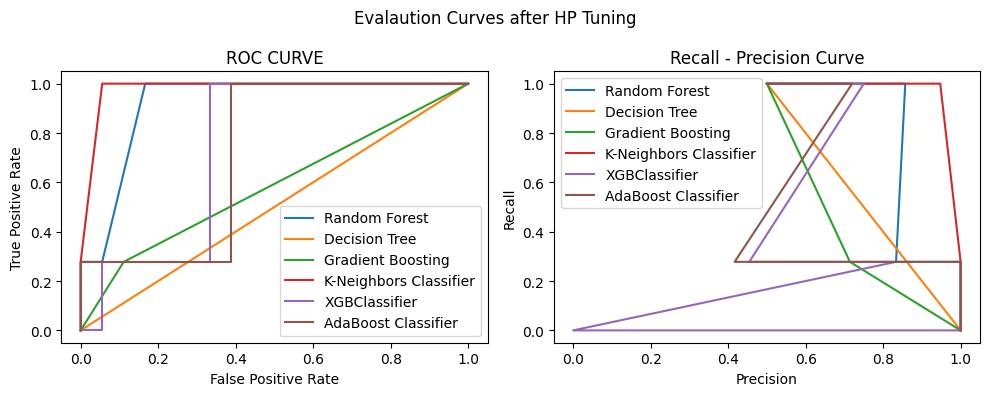

In [59]:
# Evaluating Curves after Hyperparameter tuning:

fig,ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Evalaution Curves after HP Tuning')

# Evaluating ROC Curve:

for key,value in roc_auc_curve1.items():
    ax[0].plot(value[0],value[1],label=key)
    

ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title('ROC CURVE')
ax[0].legend()


# Evaluating Precision Recall Curve:

for key,value in p_r_curve1.items():
    ax[1].plot(value[0],value[1],label=key)
    

ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Precision')
ax[1].set_title('Recall - Precision Curve')
ax[1].legend()

fig.tight_layout()
plt.show()   

After Hyperparameter tunning we can acheived an max test accuracy of 97% which is fair enough good in comparison with previous accuracy of K_Nearest Neighbours model.